## 10. Code

#### Import required libraries

In [1]:
# importing modules
import pandas as pd
import seaborn as sbn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as matplot
%matplotlib inline

#### Get a glimpse of data

In [6]:
# importing the csv into dataframe
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_faa5e729861a4eeaa13a3316168316c2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oIXKlBz0Ir6igjQ2wL22cwXOKY4mg8ARnA5BlQQuq18z',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_faa5e729861a4eeaa13a3316168316c2.get_object(Bucket='advancedatasciencecapstoneproject-donotdelete-pr-liak2ptj9ffdls',Key='HR_comma_sep.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
# Changing column names to make them more understandable
data['attrition'] = data['left']
data['department'] = data['sales']

data.drop('left', axis=1, inplace=True)
data.drop('sales', axis=1, inplace=True)

data = data[['attrition', 'department', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary']]

In [10]:
data.head()

,attrition,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,1,sales,0.38,0.53,2,157,3,0,0,low
1,1,sales,0.80,0.86,5,262,6,0,0,medium
2,1,sales,0.11,0.88,7,272,4,0,0,medium
3,1,sales,0.72,0.87,5,223,5,0,0,low
4,1,sales,0.37,0.52,2,159,3,0,0,low


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are 2 categorical variables in this dataset: 'department' and 'salary'. We need to change the labels to numeric so that we can use these variables while fitting the model.

In [11]:
# Get unique departments
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [12]:
# Get unique salaries
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [13]:
# Transform the salary categorical to numeric so that it can be fit into model
le_salary = preprocessing.LabelEncoder()
data['salary'] = le_salary.fit_transform(data['salary'])

In [14]:
# Get unique salary
data['salary'].unique()

array([1, 2, 0])

In [15]:
# Transform the department categorical to numeric so that it can be fit into model
le_dept = preprocessing.LabelEncoder()
data['department'] = le_dept.fit_transform(data['department'])

In [16]:
# Get unique department
data['department'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [17]:
# describe data
print('rows, column:',data.shape)
data.describe()

rows, column: (14999, 10)


,attrition,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,5.870525,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,1.347290
std,0.425924,2.868786,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.625819
min,0.000000,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,1.000000
50%,0.000000,7.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000
75%,0.000000,8.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,2.000000
max,1.000000,9.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000


In [18]:
# Group by attrition and find the mean
data.groupby('attrition').mean()

,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
attrition,,,,,,,,,
0,5.819041,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.347742
1,6.035284,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.345842


In [19]:
# Group by attrition and get the count
data.groupby('attrition').count()

,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
attrition,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


#### Summary of data based on above table:
* About 15,000 employee observations and 10 features
* Mean satisfaction of employees who stayed is 0.66%
* The turnover rate is 31% which is very high

In [20]:
#Correlation Matrix
data.corr()

,attrition,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
attrition,1.000000,0.032105,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.001294
department,0.032105,1.000000,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,-0.027336,0.000685
satisfaction_level,-0.388375,0.003153,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.011754
last_evaluation,0.006567,0.007772,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.013965
number_project,0.023787,0.009268,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.009672
average_montly_hours,0.071287,0.003913,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.007082
time_spend_company,0.144822,-0.018010,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.003086
Work_accident,-0.154622,0.003425,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.002506
promotion_last_5years,-0.061788,-0.027336,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.001318
salary,-0.001294,0.000685,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001318,1.000000


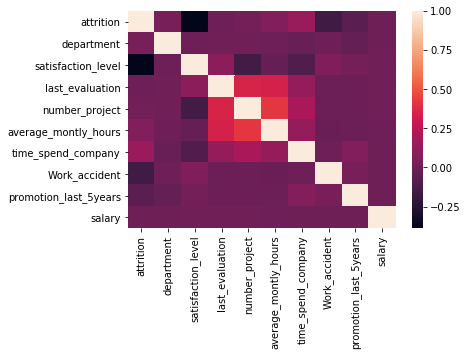

In [21]:
# Create heatmap from correlation matrix
corr = data.corr()
corr = (corr)
sbn.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values)

** Positively Correlated Features:** 
- number of projects vs average monthly hours:  0.417211
- average monthly hours vs : 0.339742
- last evaluation vs number of projects: 0.349333

**Negatively Correlated Feature:**
 - satisfaction vs attrition:  -0.388375

Text(0.5,1,'Satisfaction Level of Employees')

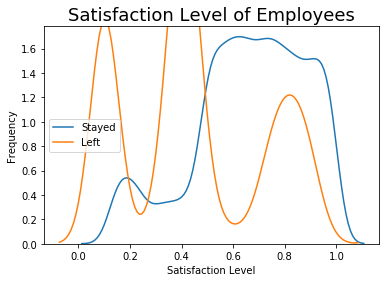

In [22]:
# Plot satisfation level of employees
ax=sbn.kdeplot(data.loc[(data.attrition==0),'satisfaction_level'],label="Stayed")
ax=sbn.kdeplot(data.loc[(data.attrition==1),'satisfaction_level'],label="Left")
ax.set(xlabel='Satisfaction Level',ylabel="Frequency")
plt.title("Satisfaction Level of Employees",fontsize=18)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Promotion in last 5 years vs Attrition')

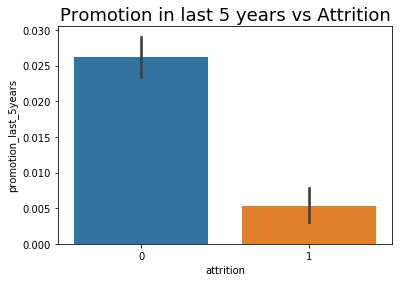

In [23]:
# Plot attrition vs promotion
sbn.barplot(data.attrition, data.promotion_last_5years)
plt.title("Promotion in last 5 years vs Attrition",fontsize=18)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Time spent in company vs Attrition')

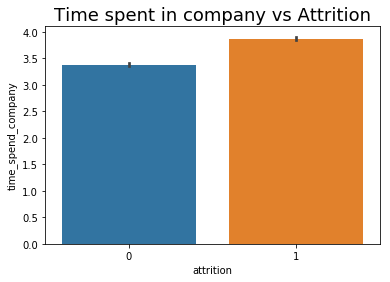

In [24]:
# plot attrition vs time spent in the company
sbn.barplot(data.attrition, data.time_spend_company)
plt.title("Time spent in company vs Attrition",fontsize=18)


Training the model:

In [25]:
# Assign vlues
X = data.drop('attrition', axis=1) 
Y = data.attrition

In [26]:
# Train the model
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, random_state=0)

In [27]:
# Apply logistic regression
lr_model = LogisticRegression()
fit = lr_model.fit(X_train, y_train)

In [28]:
# get features and weights
coeff = []
coeff = np.array(fit.coef_)
features = np.array(X.columns.values)
weights = np.vstack((features, coeff))

In [29]:
# print weights of each feature
weights

array([['department', 'satisfaction_level', 'last_evaluation',
        'number_project', 'average_montly_hours', 'time_spend_company',
        'Work_accident', 'promotion_last_5years', 'salary'],
       [0.04284062271919842, -4.065996975054979, 0.7514983674385503,
        -0.30120003909677145, 0.004414317494623952, 0.2371872366814321,
        -1.4393716679812398, -1.4671771190921523, 0.0030523925864507444]], dtype=object)

In [30]:
# 76.4% accuracy achieved
lr_model.score(X_test,y_test)

0.76400000000000001

In [31]:
# Find predicted probability from the fitted model
predict_proba = lr_model.predict_proba(X_test)
predict_proba

array([[ 0.61988364,  0.38011636],
       [ 0.6705052 ,  0.3294948 ],
       [ 0.92231785,  0.07768215],
       ..., 
       [ 0.79853904,  0.20146096],
       [ 0.76046835,  0.23953165],
       [ 0.7433782 ,  0.2566218 ]])

Using the above probability values, employees with >90% probability are highly likely to leave. Inline with the findings of this report [section 5], employer should take steps to provide enrichment and support to help the employee stay.